In [542]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.graph_objs import *
plt.style.use('fivethirtyeight')

In [543]:
df = pd.read_csv('BTC-USD.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
2742,2022-03-21,41246.132813,41454.410156,40668.042969,41077.996094,41077.996094,24615543271
2743,2022-03-22,41074.105469,43124.707031,40948.281250,42358.808594,42358.808594,32004652376
2744,2022-03-23,42364.378906,42893.507813,41877.507813,42892.957031,42892.957031,25242943069
2745,2022-03-24,42886.652344,44131.855469,42726.164063,43960.933594,43960.933594,31042992291


In [544]:
df.shape

(2747, 7)

In [545]:
#Verificando quando valores nulos possui
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [546]:
df.drop('Adj Close', inplace=True, axis=1)

In [547]:
df['Date'] = pd.to_datetime(df['Date'])

In [548]:
data_inicial = '2019-03-25'
data_final = '2021-03-25'

In [549]:
mask = (df['Date'] >= data_inicial) & (df['Date'] <= data_final)


In [550]:
df1 = df.loc[mask]
df1

,Date,Open,High,Low,Close,Volume
1650,2019-03-25,4024.112793,4038.840820,3934.031250,3963.070557,10359818883
1651,2019-03-26,3969.228760,3985.080811,3944.753174,3985.080811,10707678815
1652,2019-03-27,3984.244873,4087.066162,3977.810547,4087.066162,10897131934
1653,2019-03-28,4087.584473,4094.902100,4040.266357,4069.107178,9353915899
1654,2019-03-29,4068.299805,4113.500977,4034.097168,4098.374512,10918665557
...,...,...,...,...,...,...
2377,2021-03-21,58309.914063,58767.898438,56005.617188,57523.421875,51943414539
2378,2021-03-22,57517.890625,58471.480469,54288.156250,54529.144531,56521454974
2379,2021-03-23,54511.660156,55985.441406,53470.695313,54738.945313,56435023914
2380,2021-03-24,54710.488281,57262.382813,52514.332031,52774.265625,70567223787


In [551]:
df1.isna().any()

Date      False
Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

<h2>Criando gráfico do fechamento do Bitcoin entre 2019-2021

Text(0, 0.5, '$ Preço')

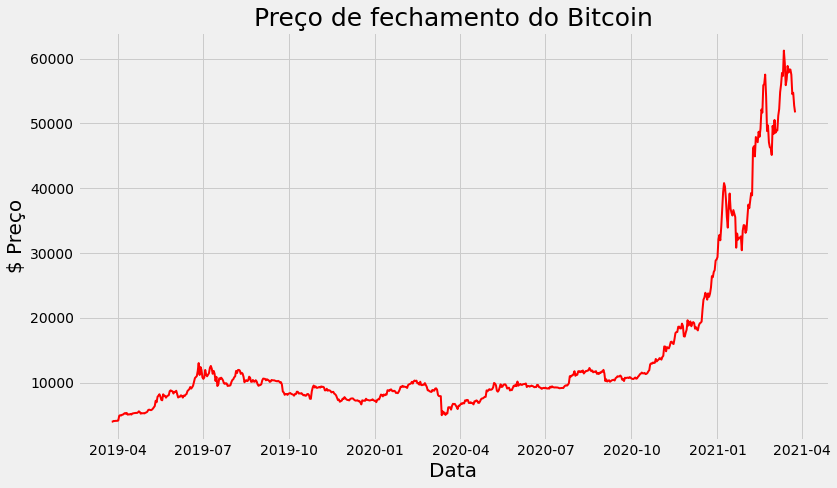

In [553]:
plt.figure(figsize = (12, 7))

plt.plot(df1["Date"], df1["Close"], color='red', lw=2)
plt.title('Preço de fechamento do Bitcoin', size=25)
plt.xlabel("Data", size=20)
plt.ylabel("$ Preço", size=20)

In [554]:
px.line(df1, y='Close', x='Date', labels={'Close': 'Fechamento no dia', 'Date': 'Data'}, title='Variação de fechamento')

<h2>Prevendo para daqui 1 ano

In [555]:
new_data_inicial = '2021-03-26'
new_data_final = '2022-03-25'

In [556]:
newMask = (df['Date'] >= data_inicial) & (df['Date'] <= new_data_final)

In [557]:
df2 = df.loc[newMask]
df2

,Date,Open,High,Low,Close,Volume
1650,2019-03-25,4024.112793,4038.840820,3934.031250,3963.070557,10359818883
1651,2019-03-26,3969.228760,3985.080811,3944.753174,3985.080811,10707678815
1652,2019-03-27,3984.244873,4087.066162,3977.810547,4087.066162,10897131934
1653,2019-03-28,4087.584473,4094.902100,4040.266357,4069.107178,9353915899
1654,2019-03-29,4068.299805,4113.500977,4034.097168,4098.374512,10918665557
...,...,...,...,...,...,...
2742,2022-03-21,41246.132813,41454.410156,40668.042969,41077.996094,24615543271
2743,2022-03-22,41074.105469,43124.707031,40948.281250,42358.808594,32004652376
2744,2022-03-23,42364.378906,42893.507813,41877.507813,42892.957031,25242943069
2745,2022-03-24,42886.652344,44131.855469,42726.164063,43960.933594,31042992291


In [558]:
predicao = 365

#Criando uma nova coluna para predição
df2['Prediction'] = df2['Close'].shift(-365)
df2

C:\Users\Gui carmona\AppData\Local\Temp\ipykernel_2620\3674262587.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,Open,High,Low,Close,Volume,Prediction
1650,2019-03-25,4024.112793,4038.840820,3934.031250,3963.070557,10359818883,6734.803711
1651,2019-03-26,3969.228760,3985.080811,3944.753174,3985.080811,10707678815,6681.062988
1652,2019-03-27,3984.244873,4087.066162,3977.810547,4087.066162,10897131934,6716.440430
1653,2019-03-28,4087.584473,4094.902100,4040.266357,4069.107178,9353915899,6469.798340
1654,2019-03-29,4068.299805,4113.500977,4034.097168,4098.374512,10918665557,6242.193848
...,...,...,...,...,...,...,...
2742,2022-03-21,41246.132813,41454.410156,40668.042969,41077.996094,24615543271,NaN
2743,2022-03-22,41074.105469,43124.707031,40948.281250,42358.808594,32004652376,NaN
2744,2022-03-23,42364.378906,42893.507813,41877.507813,42892.957031,25242943069,NaN
2745,2022-03-24,42886.652344,44131.855469,42726.164063,43960.933594,31042992291,NaN


In [559]:
#Criando um dataset independente
X = np.array(df2[['Close']])
X = X[:-predicao]
print(X)

[[ 3963.070557]
 [ 3985.080811]
 [ 4087.066162]
 [ 4069.107178]
 [ 4098.374512]
 [ 4106.660156]
 [ 4105.404297]
 [ 4158.183105]
 [ 4879.87793 ]
 [ 4973.021973]
 [ 4922.798828]
 [ 5036.681152]
 [ 5059.817383]
 [ 5198.896973]
 [ 5289.770996]
 [ 5204.958496]
 [ 5324.551758]
 [ 5064.487793]
 [ 5089.539063]
 [ 5096.586426]
 [ 5167.722168]
 [ 5067.108398]
 [ 5235.55957 ]
 [ 5251.937988]
 [ 5298.385742]
 [ 5303.8125  ]
 [ 5337.88623 ]
 [ 5314.53125 ]
 [ 5399.365234]
 [ 5572.362305]
 [ 5464.866699]
 [ 5210.515625]
 [ 5279.348145]
 [ 5268.291016]
 [ 5285.13916 ]
 [ 5247.352539]
 [ 5350.726563]
 [ 5402.697266]
 [ 5505.283691]
 [ 5768.289551]
 [ 5831.16748 ]
 [ 5795.708496]
 [ 5746.807129]
 [ 5829.501465]
 [ 5982.45752 ]
 [ 6174.528809]
 [ 6378.849121]
 [ 7204.771484]
 [ 6972.371582]
 [ 7814.915039]
 [ 7994.416016]
 [ 8205.167969]
 [ 7884.90918 ]
 [ 7343.895508]
 [ 7271.208008]
 [ 8197.689453]
 [ 7978.309082]
 [ 7963.327637]
 [ 7680.066406]
 [ 7881.84668 ]
 [ 7987.371582]
 [ 8052.543945]
 [ 8673.

In [560]:
#Criando um dataset dependente
y=df2['Prediction'].values
y = y[:-predicao]
print(y)


[ 6734.803711  6681.062988  6716.44043   6469.79834   6242.193848
  5922.042969  6429.841797  6438.644531  6606.776367  6793.624512
  6733.387207  6867.527344  6791.129395  7271.78125   7176.414551
  7334.098633  7302.089355  6865.493164  6859.083008  6971.091797
  6845.037598  6842.427734  6642.109863  7116.804199  7096.18457
  7257.665039  7189.424805  6881.958496  6880.323242  7117.20752
  7429.724609  7550.900879  7569.936035  7679.867188  7795.601074
  7807.058594  8801.038086  8658.553711  8864.766602  8988.59668
  8897.46875   8912.654297  9003.070313  9268.761719  9951.518555
  9842.666016  9593.896484  8756.430664  8601.795898  8804.477539
  9269.987305  9733.72168   9328.197266  9377.013672  9670.739258
  9726.575195  9729.038086  9522.981445  9081.761719  9182.577148
  9209.287109  8790.368164  8906.93457   8835.052734  9181.017578
  9525.750977  9439.124023  9700.414063  9461.058594 10167.268555
  9529.803711  9656.717773  9800.636719  9665.533203  9653.679688
  9758.852539

<h3>Aplicando a Regressão Linear e treinando o modelo


In [561]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= .25, random_state=0)

In [562]:
modelo = LinearRegression()
modelo.fit(x_train, y_train)

LinearRegression()

In [563]:
modelo.score(x_test, y_test)


0.0543639034053911

In [564]:
x_predicao = np.array(df2[['Close']])[-predicao:]
print(x_predicao)

[[55137.3125  ]
 [55973.511719]
 [55950.746094]
 [57750.199219]
 [58917.691406]
 [58918.832031]
 [59095.808594]
 [59384.3125  ]
 [57603.890625]
 [58758.554688]
 [59057.878906]
 [58192.359375]
 [56048.9375  ]
 [58323.953125]
 [58245.003906]
 [59793.234375]
 [60204.964844]
 [59893.453125]
 [63503.457031]
 [63109.695313]
 [63314.011719]
 [61572.789063]
 [60683.820313]
 [56216.183594]
 [55724.265625]
 [56473.03125 ]
 [53906.089844]
 [51762.273438]
 [51093.652344]
 [50050.867188]
 [49004.253906]
 [54021.753906]
 [55033.117188]
 [54824.703125]
 [53555.109375]
 [57750.175781]
 [57828.050781]
 [56631.078125]
 [57200.292969]
 [53333.539063]
 [57424.007813]
 [56396.515625]
 [57356.402344]
 [58803.777344]
 [58232.316406]
 [55859.796875]
 [56704.574219]
 [49150.535156]
 [49716.191406]
 [49880.535156]
 [46760.1875  ]
 [46456.058594]
 [43537.511719]
 [42909.402344]
 [37002.441406]
 [40782.738281]
 [37304.691406]
 [37536.632813]
 [34770.582031]
 [38705.980469]
 [38402.222656]
 [39294.199219]
 [38436.

<h3>Valores previstos para 1 ano

In [565]:
linear_predict = modelo.predict(x_predicao)
print(linear_predict)

[48236.41007715 48555.45486534 48546.76883234 49233.33505732
 49678.78189469 49679.21709058 49746.74101164 49856.81725363
 49177.51224223 49618.06461664 49732.26925778 49402.03755083
 48584.23293852 49452.2460408  49422.12362944 50012.83796022
 50169.93026225 50051.07558247 51428.44224987 51278.20577384
 51356.16098236 50691.8121037  50352.63354421 48648.04428087
 48460.35711176 48746.04234658 47766.64741465 46948.69227235
 46693.58551015 46295.71959296 45896.39308645 47810.77806596
 48196.65523106 48117.13659594 47632.73376483 49233.32611475
 49263.03866687 48806.34380419 49023.52294668 47548.19547341
 49108.87946627 48716.84845257 49083.08516744 49635.31894118
 49417.28282038 48512.06792178 48834.38562151 45952.20546866
 46168.02685951 46230.73083689 45040.18839872 44924.15056922
 43810.60352398 43570.95366787 41317.20233867 42759.54285797
 41432.52328736 41521.01858296 40465.65514108 41967.17335894
 41851.27711687 42191.60328214 41864.53419717 40819.35314713
 40406.70100225 40811.92

<h2>Gerando um novo dataframe para imprimir a Previsão e o Fechamento

In [566]:
data_previsao = (df['Date'] >= new_data_inicial) & (df['Date'] <= new_data_final)
df3 = df.loc[data_previsao]
df3


,Date,Open,High,Low,Close,Volume
2382,2021-03-26,51683.011719,55137.312500,51579.855469,55137.312500,56652197978
2383,2021-03-27,55137.566406,56568.214844,54242.910156,55973.511719,47266542233
2384,2021-03-28,55974.941406,56610.312500,55071.113281,55950.746094,47686580918
2385,2021-03-29,55947.898438,58342.097656,55139.339844,57750.199219,57625587027
2386,2021-03-30,57750.132813,59447.222656,57251.550781,58917.691406,54414116432
...,...,...,...,...,...,...
2742,2022-03-21,41246.132813,41454.410156,40668.042969,41077.996094,24615543271
2743,2022-03-22,41074.105469,43124.707031,40948.281250,42358.808594,32004652376
2744,2022-03-23,42364.378906,42893.507813,41877.507813,42892.957031,25242943069
2745,2022-03-24,42886.652344,44131.855469,42726.164063,43960.933594,31042992291


In [567]:
a = 0
a = df3['Close']
#df3['Close'] = data_previsao
df3['Prediction'] = df3['Close']
#data_previsao = df3['Prediction']
df3['Prediction'] = linear_predict
df3

C:\Users\Gui carmona\AppData\Local\Temp\ipykernel_2620\1893158223.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Gui carmona\AppData\Local\Temp\ipykernel_2620\1893158223.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,Open,High,Low,Close,Volume,Prediction
2382,2021-03-26,51683.011719,55137.312500,51579.855469,55137.312500,56652197978,48236.410077
2383,2021-03-27,55137.566406,56568.214844,54242.910156,55973.511719,47266542233,48555.454865
2384,2021-03-28,55974.941406,56610.312500,55071.113281,55950.746094,47686580918,48546.768832
2385,2021-03-29,55947.898438,58342.097656,55139.339844,57750.199219,57625587027,49233.335057
2386,2021-03-30,57750.132813,59447.222656,57251.550781,58917.691406,54414116432,49678.781895
...,...,...,...,...,...,...,...
2742,2022-03-21,41246.132813,41454.410156,40668.042969,41077.996094,24615543271,42872.195996
2743,2022-03-22,41074.105469,43124.707031,40948.281250,42358.808594,32004652376,43360.879247
2744,2022-03-23,42364.378906,42893.507813,41877.507813,42892.957031,25242943069,43564.679097
2745,2022-03-24,42886.652344,44131.855469,42726.164063,43960.933594,31042992291,43972.156584


Text(0, 0.5, '$ Preço')

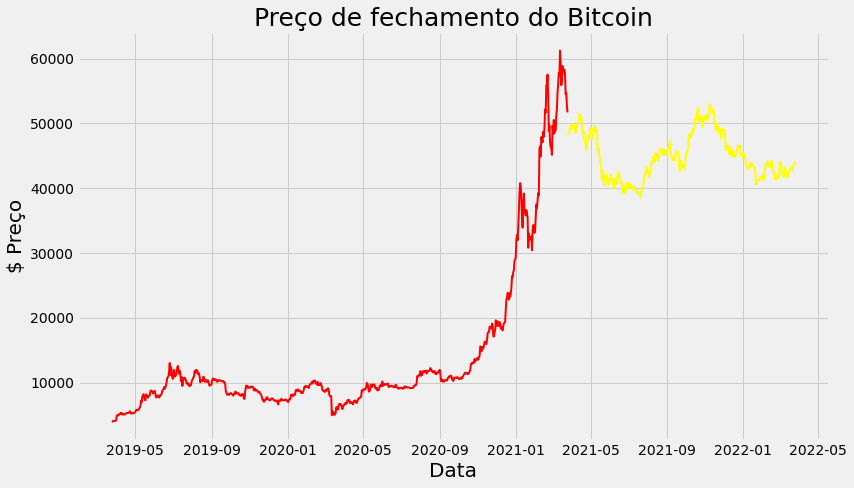

In [568]:
plt.figure(figsize = (12, 7))

plt.plot(df1["Date"], df1["Close"], color='red', lw=2)
plt.plot(df3["Date"], df3["Prediction"], color='Yellow', lw=2)
plt.title('Preço de fechamento do Bitcoin', size=25)
plt.xlabel("Data", size=20)
plt.ylabel("$ Preço", size=20)
plt.legend

In [569]:
px.line(df3, y='Prediction', x='Date', labels={'Previsão': 'Previsão de fechamento', 'Date': 'Data'}, title='Variação da previsão de fechamento')